#K-Means Clustering

**$k$-Means** is an unsupervised machine learning algorithm used to classify categorical data.

**Unsupervised** machine learning is implemented when data are not pre-labelled. Labels are generated after the data are sorted into groups based on similarity, or **clusters**, which can then be potentially labelled a class.

The goal of cluster analysis is to **extract and enhance the natural structure of the data**, and not to impose arbitrary structure.

Specifically, $k$-Means is a **greedy** learner that partitions a dataset into $k$ clusters. It's greedy because it captures the local structure of the data; partitioning performs complete clustering, where each point belonging to exactly one cluster.

Partitions are determined by assigning each point to the nearest **centroid**, which is the mean of the data points in a cluster. This requires continuous (vector-like) features and highlights the iterative nature of algorithm.

<img src="kmeans_visualization.png">

Note, however, that **partitions are not scale-invariant**, which means that the same data can yield very different clusters depending on the **scale and the units used**. This means that data representation (e.g., the scale of the initial visualization) is very important before applying a clustering algorithm. For example, the visualizations below represent the same data set differently:

<img src="same_data_diff_viz.png">

To apply $k$-Means:
<ol>
<li>Choose $k$ initial centroids (note that $k$ is an input)</li>
<li>For each point:
    <ul>
    <li>Find distance to each centroid</li>
    <li>Assign point to nearest centroid</li>
    </ul>
</li>
<li>Recalculate centroid positions</li>
<li>Rinse and repeat steps 2 and 3 until stopping criteria are met</li>
</ol>

It loosely resembles a "ready, fire, aim" optimization approach.

<img src="kmeans_viz.png">

Note that $k$-Means has a hard time dealing with non-convex clusters, or data with widely varying shapes and densities. This can potentially be remedied by increasing the $k$ and combining subclusters in a post-processing step.

There are several ways to choose initial centroid positions:
<ul>
<li>Randomly (but this may yield divergent behavior)</li>
<li>First perform an alternative clustering task, then use the resulting centroids as initial $k$-Means centroid</li>
<li>Start with a global centroid, and choose a point a max distance, then repeat (but this risks selecting an outlier as a centroid)</li>
</ul>

**"Nearness"** is measured similarly to $k$NN - based on similarity or distance, where similarity must satisfy certain conditions:

<img src="symmetry_conditions.png">

####Similarity Measures

For data that takes values in $R^n$, we can use **Euclidean distance**:

$$d(x,y) = \sqrt {\sum (x_i - y_i)^2}$$

A matrix whose entries $D_{ij}$ contains $d(x,y)$ for all $x$ and $y$ is called the [**distance matrix**](http://en.wikipedia.org/wiki/Distance_matrix).

For text mining problems (or any problem with sparse binary data), we can use the [**Jaccard coefficient**](http://en.wikipedia.org/wiki/Jaccard_index):

$$J(A,B) = \frac{|A \cap B|}{|A \cup B|}$$

The formula above can be read as:

**The similarity $J$ between $A$ and $B$ is equal to the absolute value of the intersection of the data in $A$ and $B$ divided by the union of the data between $A$ and $B$.**

Let's make the above statement more concrete with an example. Say we have two arrays generated from SMS messages:

<code>A = ['please', 'call', 'me', 'soon']</code><br>
<code>B = ['call', 'me', 'now']</code>

${|A \cap B|}$ <code>= ['call', 'me']</code> = 2<br>
${|A \cup B|}$ <code>= ['please', 'call', 'me', 'soon', 'now']</code> = 5

$$\Longrightarrow J(A,B) = \frac{2}{5}$$

####Objective Function

We can compute the centroid positions at each iteration of the algorithm by optimizing an **objective function** that tells use how "good" the clustering is.

One common objective function when using Euclidean distance is the **sum of squared errors** ($SSE$) from each point $x$ to its centroid $c_i$:

$$SSE = \sum\limits_{i=1}^K \sum\limits_{x \in C_i} d(x_i, c_i)^2$$

Given two clustering results, the optimal one will be the one with lower SSE because a lower SSE means the centroids have converged to better locations (i.e., a better local optimum). 

If this sounds familiar, this is conceptually similar for the concept of **least residual squares** in linear regression, since it generally involves minimizing the distance between a mean value and a data point.

#### Convergence

We then continue to iterate on the model until some stopping criteria are met, a few examples being:
<ul>
<li>centroid positions change by no more than $\varepsilon$</li>
<li>no more than $x$% change in clusters between iterations</li>
</ul>

Remember that, in general, different runs of the algorithm will converge to different local centroid configurations.

###Cluster Validation

$k$-means will converge to a solution and will return a set of $k$ clusters, even if no natural clusters exist in the data. As a result, we'll need to validate these clustering attempts. Two useful metrics we can use are **cohesion** and **separation**.

**Cohesion** measures clustering effectiveness **within a cluster**:

$$\hat{C} (C_i) = \sum \limits_{x \in C_i} d(x, c_i)$$

where $d(x,c_i)$ is the distance between each point in a cluster and the centroid.

**Separation** measures clustering effectiveness **between clusters**:

$$\hat{S} (C_i,C_j) = d(c_i,c_j)$$

where $d(c_i,c_j)$ is the distance between centroids in different clusters.

<img src="cohesion_separation.png">

We can then turn these values into overall measures of cluster validity by taking a **weighted sum over clusters**:

$$\hat{V}_{total} = \sum\limits_{1}^K w_i \hat{V} (C_i)$$

where $V$ can be cohesion, separation, or some function of both.

The weights can all be set to 1 - which is best for $k$-Means - or proportional to the cluster masses (i.e., the number of points they contain).

These validation measures can be used to identify clusters that should be split or merged, or to identify individual points with a disproportionate effect on the overall clustering (like outliers).

####Silhouette Coefficent

One useful measure that combines cohesion and separation is the **silhouette coefficient** ($SC$). For a point $x_i$, this is given by:

$$SC_i = \frac{b_i - a_i}{max(a_i,b_i)}$$

where:
<ul>
<li>$a_i$ = average in-cluster distance to $x_i$</li>
<li>$b_{ij}$ = average between-cluster distance to $x_i$</li>
<li>$b_i$ = $min_j(b_{ij})$</li>
</ul>

The silhouette coefficient can take values between -1 and 1.

In general, we want separation to be high and cohesion to be low, which corresponds to a value of $SC$ close to +1. A negative $SC$ means the cluster radius is larger is larger than the space between clusters (i.e., the clusters overlap).

<img src="silhouette_coefficient.png">

The $SC$ for an **individual cluster** is given by the **average $SC$ across all points in $C_i$**:

$$SC(C_i) = \frac{1}{m_i} \sum\limits_{x \in C_i} SC_i$$

The **overall $SC$** is given by the **average $SC$ across all points**, which gives a summary measure of the overall clustering quality:

$$SC_{total} = \frac{1}{k} \sum\limits_1^k SC(C_i)$$

We can compute the best number of clusters for a dataset **by computing the overall $SSE$ or $SC$ for different values of $k$**.

<img src="sse_sc.png">

Based on the examples above, the optimal $k$ seems to be 10 clusters, since we are looking for low values of $SSE$ and high values of $SC$.

##Implementing $k$-Means

Now, we'll implement $k$-Means using a sample dataset and some of <code>scikit-learn</code>'s packages.

First, let's create some unlabelled sample data to use. We'll use the following characteristics:

<ul>
<li>There should be four clusters of points</li>
<li>Each cluster should be formed by points whose coordinates come from a 2D Gaussian</li>
<li>The 2D Gaussians should have the following centers: (1,1), (1,3), (3,1), (3,3)</li>
<li>They should have a variance of 0.1, and a covariance of 0</li>
</ul>

The **<code>np.random.multivariate</code>** function, which we'll use to generate the data, takes three parameters: mean, covariance, and number of samples.

To start, let's import a few packages we'll need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In the code below, <code>np.random.multivariate_normal</code> samples from a Gaussian distribution to generate a collection of points. Let's first get comfortable with sampling from a distribution.

In [3]:
sample = np.random.multivariate_normal([1,1],[[.1,0],[0,.1]],20)

print sample

[[ 0.90310995  1.3146796 ]
 [ 0.85361537  1.24392748]
 [ 1.91933219  1.32999538]
 [ 1.06636829  1.43349867]
 [ 0.52557843  1.38126666]
 [ 1.01448039  0.44581522]
 [ 1.05422005  0.90831376]
 [ 1.24919566  1.38441503]
 [ 1.88348032  1.24854452]
 [ 0.60629351  1.00581853]
 [ 1.11200319  1.26774841]
 [ 1.11375399  0.84642551]
 [ 0.95196821  0.865351  ]
 [ 1.07178612  1.12170878]
 [ 0.91887868  1.16777088]
 [ 0.49580684  0.91714834]
 [ 1.2908708   0.70686633]
 [ 0.70333069  1.02430366]
 [ 1.60984766  1.33904519]
 [ 0.97644148  1.24397679]]


Let's plot the data to get a feel for it.

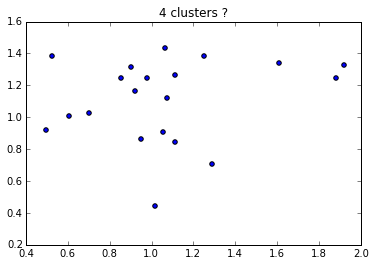

In [4]:
plt.scatter(sample[:,0], sample[:,1])
plt.title('4 clusters ?')
plt.show()

Now, we'll create our clusters by creating four separate groups of data and using **<code>np.vpstack</code>** to union the groups together.

In [5]:
data = np.vstack([np.random.multivariate_normal([1,1],[[.1,0],[0,.1]],20),
                 np.random.multivariate_normal([1,3],[[.1,0],[0,.1]],20),
                 np.random.multivariate_normal([3,1],[[.1,0],[0,.1]],20),
                 np.random.multivariate_normal([3,3],[[.1,0],[0,.1]],20)])

In [6]:
data[:10, :]

array([[ 0.31503476,  1.32690641],
       [ 1.56755209,  1.54892116],
       [ 1.45941232,  1.54308457],
       [ 1.19758976,  1.17006995],
       [ 1.1799548 ,  0.9349318 ],
       [ 1.35714735,  1.20400106],
       [ 1.87880039,  1.30938693],
       [ 0.59255085,  1.28103083],
       [ 1.02436002,  1.24709921],
       [ 0.60719247,  0.65234262]])

Let's plot these points. We should get a graph that more closely resembles four clusters of data now.

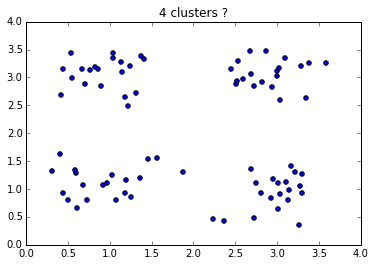

In [7]:
plt.scatter(data[:,0], data[:,1])
plt.title('4 clusters ?')
plt.show()

Now, we'll create load **<code>KMeans</code>** from scikit-learn and create and $k$-Means instance.

In [8]:
from sklearn.cluster import KMeans

We'll create a <code>KMeans</code> instance with four clusters, random initialization, a <code>random_state</code> of 1, one initial centroid seed (<code>n_init=1</code>), and maximum number of iterations equal to 1:

In [9]:
km = KMeans(n_clusters=4,
            init='random',
            n_init=1,
            max_iter=1,
            random_state=1)

Now, we'll fit the model on all the data.

In [10]:
km.fit(data)

KMeans(copy_x=True, init='random', max_iter=1, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances=True, random_state=1, tol=0.0001,
    verbose=0)

From here, we can extract the coordinates of the cluster centers (centroids) using the **<code>cluster\_centers_</code>** method:

In [11]:
centroids = km.cluster_centers_
centroids

array([[ 2.85772702,  1.62861576],
       [ 0.96637732,  3.09723783],
       [ 0.86420477,  1.20075413],
       [ 3.10161673,  3.25912263]])

Next, we'll predict the clusters for each data point using the <code>predict</code> method:

In [12]:
y = km.predict(data)
print y

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


We'll plot the points with a different color for each cluster, and we'll represent the centroids as red squares:

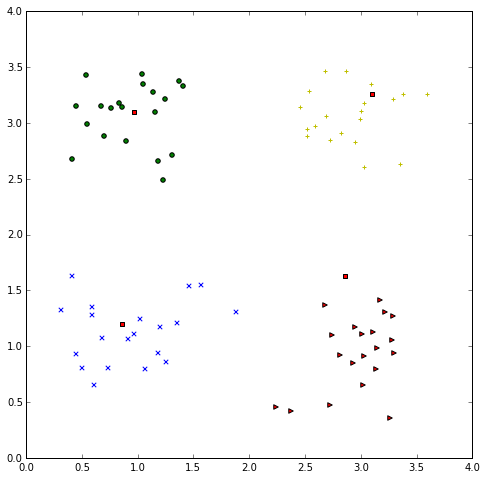

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for t,marker,c in zip(xrange(4),">ox+","rgby") :
    ax.scatter(data[y == t,0],
                data[y == t,1],
                marker=marker,
                c=c)

ax.scatter(centroids[:,0],centroids[:,1],marker = 's',c='r')

Looks pretty good so far but let's see if we can improve the model a bit. We'll create another instance with four clusters, improved initialization (<code>"k-means++"</code>), ten initial centroid seeds, and a maximum of 300 iterations:

In [14]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10 , max_iter = 300, random_state=1)

We'll condense the previous workflow into a function that takes in all the data and returns the graph. Note that the function is specifically for models where $k$ = 4.

In [15]:
def do_kmeans_4(km, data):
    km.fit(data)
    centroids = km.cluster_centers_
    print "centroids:", centroids
    y = km.predict(data)
    
    
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    for t,marker,c in zip(xrange(4),">ox+","rgby") :
        ax.scatter(data[y == t,0],
                   data[y == t,1],
                   marker=marker,
                   c=c)

    ax.scatter(centroids[:,0],centroids[:,1],marker = 's',c='r')

Let's call the new function to see what happens:

centroids: [[ 0.93888343  3.07634391]
 [ 0.93731981  1.1322555 ]
 [ 2.97036944  0.93412588]
 [ 2.90378129  3.07279517]]


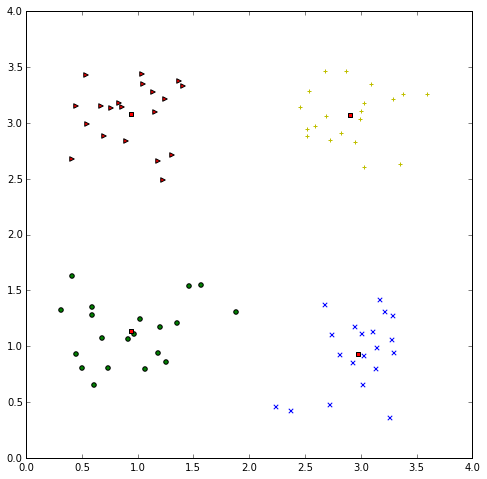

In [16]:
do_kmeans_4(km, data)

Not too shabby!

####Blurred Boundaries (Potentially Overlapping Clusters)

In this example, we'll generate data points with a larger variance of 0.5 (as compared to the original 0 in the previous example) around the original centroids.

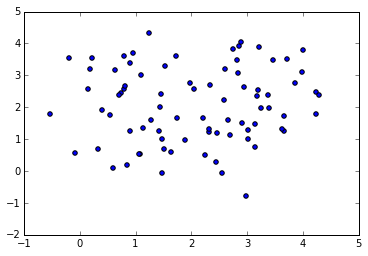

In [17]:
data1 = np.vstack([np.random.multivariate_normal([1,1],[[.5,0],[0,.5]],20),
                 np.random.multivariate_normal([1,3],[[.5,0],[0,.5]],20),
                 np.random.multivariate_normal([3,1],[[.5,0],[0,.5]],20),
                 np.random.multivariate_normal([3,3],[[.5,0],[0,.5]],20)])
plt.scatter(data1[:,0], data1[:,1])

Let's follow the same workflow as before:

<ol>
<li>Initialize a new <code>KMeans</code> classifier</li>
<li>Use the new <code>do_kmeans_4</code> to fit and plot the new data</li>
</ol>

centroids: [[ 2.93255365  1.19654188]
 [ 0.93287874  3.09506108]
 [ 1.0061444   1.0178228 ]
 [ 3.28971869  3.13478895]]


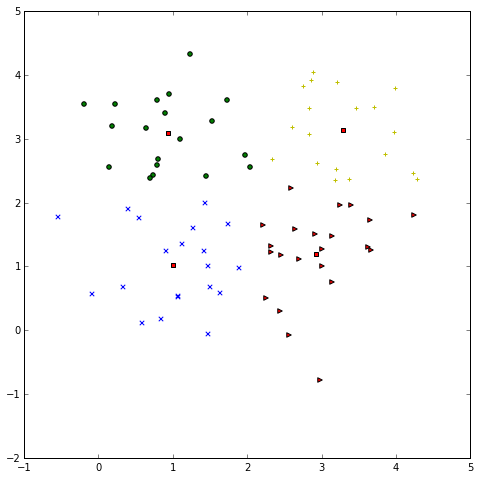

In [18]:
km = KMeans(n_clusters=4, random_state=1)

do_kmeans_4(km, data1)

What happens when we repeat the workflow with **150 points per cluster** rather than the 20 we've been using?

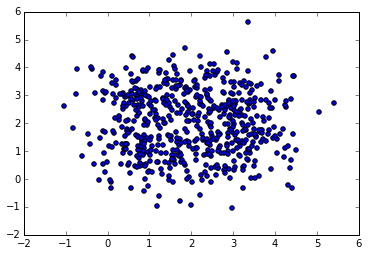

In [19]:
data1 = np.vstack([np.random.multivariate_normal([1,1],[[.5,0],[0,.5]],150),
                 np.random.multivariate_normal([1,3],[[.5,0],[0,.5]],150),
                 np.random.multivariate_normal([3,1],[[.5,0],[0,.5]],150),
                 np.random.multivariate_normal([3,3],[[.5,0],[0,.5]],150)])
plt.scatter(data1[:,0], data1[:,1])

centroids: [[ 0.96007988  3.01366965]
 [ 3.07006364  1.10895569]
 [ 0.95459164  0.92570192]
 [ 2.96747856  2.97443494]]


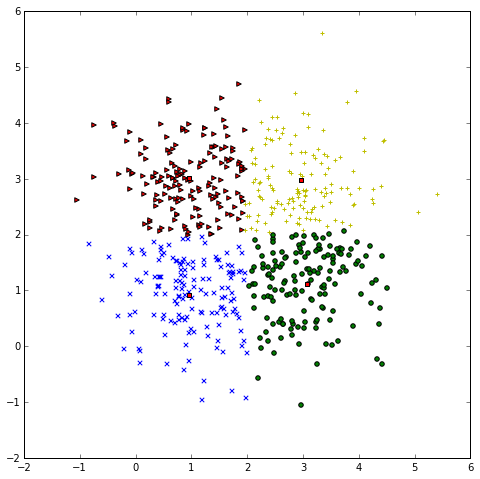

In [20]:
do_kmeans_4(km, data1)

It looks like the clusters are starting to creep in on each other...